In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/06_Jun.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,26.000000,56.000000,1,5,1,2705.0,2754.0,2786.0,2721.0,3006.0,2313.0,2709.083333,2634.0
1,25.916667,56.416667,1,5,1,2675.0,2746.0,2768.0,2686.0,2974.0,2307.0,2692.750000,2572.0
2,25.833333,56.833333,1,5,1,2653.0,2720.0,2731.0,2673.0,2969.0,2340.0,2678.083333,2555.0
3,25.750000,57.250000,1,5,1,2640.0,2698.0,2785.0,2644.0,2950.0,2361.0,2657.166667,2534.0
4,25.666667,57.666667,2,5,1,2634.0,2705.0,2754.0,2620.0,2918.0,2299.0,2637.583333,2519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8635,35.122450,45.925632,23,1,0,3617.0,3511.0,3446.0,3798.0,3313.0,3766.0,3555.500000,3645.0
8636,35.122450,45.925632,24,1,0,3632.0,3492.0,3457.0,3695.0,3410.0,3745.0,3576.166667,3705.0
8637,35.122450,45.925632,24,1,0,3622.0,3548.0,3436.0,3696.0,3484.0,3769.0,3601.000000,3734.0
8638,35.000000,45.925632,24,1,0,3648.0,3591.0,3467.0,3675.0,3565.0,3824.0,3626.333333,3771.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   int64  
 3   B       8640 non-null   int64  
 4   C       8640 non-null   int64  
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 877.6 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8640 non-null   float64
 1   Hum     8640 non-null   float64
 2   A       8640 non-null   float64
 3   B       8640 non-null   float64
 4   C       8640 non-null   float64
 5   D       8640 non-null   float64
 6   E       8640 non-null   float64
 7   F       8640 non-null   float64
 8   G       8640 non-null   float64
 9   H       8640 non-null   float64
 10  I       8640 non-null   float64
 11  J       8640 non-null   float64
 12  Cons    8640 non-null   float64
dtypes: float64(13)
memory usage: 877.6 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head(105)
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.538286,-0.801392,-0.118753,-1.516446,0.918583,0.644431,-0.288820,-0.036396,0.103380,-1.290881,-1.153361,-0.552683,-0.208051
101,-0.567988,-0.841731,-0.081830,-1.516446,0.918583,0.644431,-0.337562,-0.078730,0.029379,-1.297235,-1.190219,-0.634627,-0.259646
102,-0.576475,-0.882070,-0.044908,-1.516446,0.918583,0.644431,-0.401139,-0.085080,0.001892,-1.352300,-1.190219,-0.583689,-0.309607
103,-0.561624,-0.922410,-0.007986,-1.516446,0.918583,0.644431,-0.466834,-0.178213,-0.055194,-1.413719,-1.222742,-0.743147,-0.353390


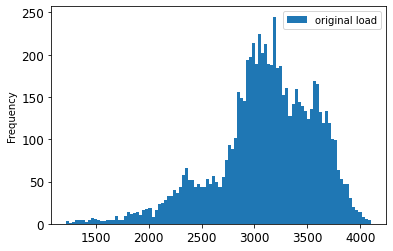

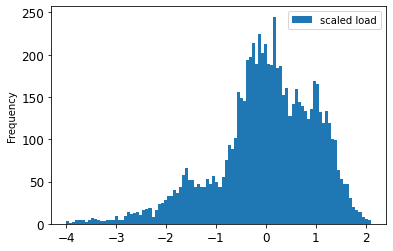

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

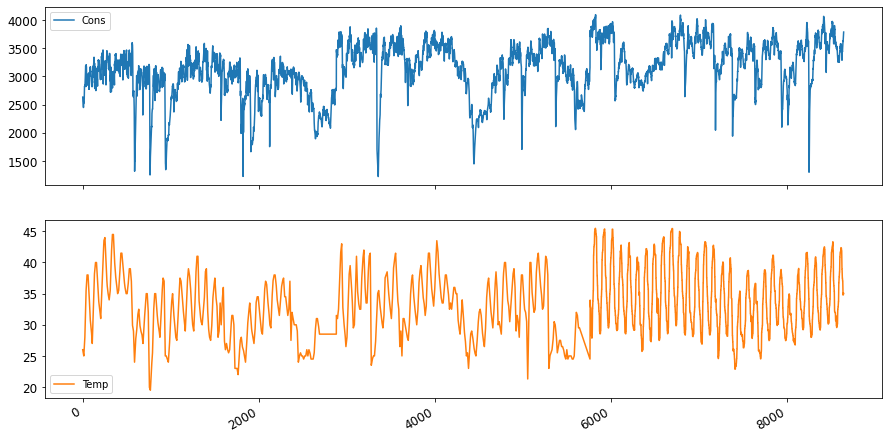

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,-0.316457,-1.892574,-0.871163,-0.538286
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,-0.385837,-1.905862,-0.906771,-0.567988
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,-0.396678,-1.832777,-0.938746,-0.576475
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,-0.437873,-1.786269,-0.984346,-0.561624
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,-0.507254,-1.923580,-1.027040,-0.612541
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,-0.587475,-1.828348,-1.068825,-0.555259
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,-0.537608,-1.784054,-1.110610,-0.500098
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,-0.693714,-1.775195,-1.153667,-0.474640
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,-0.663360,-1.830563,-1.200176,-0.553137
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,-0.695882,-1.728686,-1.239054,-0.606176


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.005029,-1.317734,0.176625,-1.660891,0.423061,0.644431,-0.854650,-0.751832,-0.685262,-0.863068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029
1,-1.136566,-1.333869,0.197138,-1.660891,0.423061,0.644431,-0.918226,-0.768766,-0.723320,-0.937194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566
2,-1.172632,-1.350005,0.217650,-1.660891,0.423061,0.644431,-0.964849,-0.823799,-0.801550,-0.964727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632
3,-1.217185,-1.366141,0.238162,-1.660891,0.423061,0.644431,-0.992398,-0.870366,-0.687377,-1.026145,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185
4,-1.249008,-1.382276,0.258675,-1.516446,0.423061,0.644431,-1.005114,-0.855549,-0.752921,-1.076975,...,NaN,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008
5,-1.255373,-1.398412,0.279187,-1.516446,0.423061,0.644431,-1.136505,-0.919049,-0.769835,-1.112979,...,NaN,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373
6,-1.310534,-1.414548,0.299699,-1.516446,0.423061,0.644431,-1.172531,-0.965616,-0.824808,-1.112979,...,NaN,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534
7,-1.372059,-1.430683,0.320212,-1.516446,0.423061,0.644431,-1.217035,-0.993133,-0.871323,-1.144747,...,NaN,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059
8,-1.397517,-1.446819,0.340724,-1.372000,0.423061,0.644431,-1.248823,-1.005833,-0.856522,-1.278174,...,NaN,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517
9,-1.372059,-1.462955,0.361236,-1.372000,0.423061,0.644431,-1.255180,-1.137067,-0.919952,-1.803410,...,-1.005029,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.297804,-1.479090,0.381749,-1.372000,0.423061,0.644431,-1.310280,-1.173050,-0.966467,-2.042732,...,-1.136566,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059,-1.297804
11,-1.240522,-1.495226,0.402261,-1.372000,0.423061,0.644431,-1.371737,-1.217501,-0.993953,-2.076618,...,-1.172632,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059,-1.297804,-1.240522
12,-1.242644,-1.511362,0.422774,-1.227555,0.423061,0.644431,-1.397167,-1.249251,-1.006639,-2.004610,...,-1.217185,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059,-1.297804,-1.240522,-1.242644
13,-1.242644,-1.462955,0.406364,-1.227555,0.423061,0.644431,-1.371737,-1.255601,-1.137727,-1.445487,...,-1.249008,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059,-1.297804,-1.240522,-1.242644,-1.242644
14,-1.234157,-1.414548,0.389954,-1.227555,0.423061,0.644431,-1.297565,-1.310634,-1.173671,-1.341711,...,-1.255373,-1.310534,-1.372059,-1.397517,-1.372059,-1.297804,-1.240522,-1.242644,-1.242644,-1.234157


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7091 entries, 10 to 7100
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7091 non-null   float64
 1   Temp           7091 non-null   float64
 2   Hum            7091 non-null   float64
 3   A              7091 non-null   float64
 4   B              7091 non-null   float64
 5   C              7091 non-null   float64
 6   D              7091 non-null   float64
 7   E              7091 non-null   float64
 8   F              7091 non-null   float64
 9   G              7091 non-null   float64
 10  H              7091 non-null   float64
 11  I              7091 non-null   float64
 12  J              7091 non-null   float64
 13  y_t+100        7091 non-null   float64
 14  Cons_t-10      7091 non-null   float64
 15  Cons_t-9       7091 non-null   float64
 16  Cons_t-8       7091 non-null   float64
 17  Cons_t-7       7091 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-0.506463
11,-0.427965
12,-0.447059
13,-0.037599
14,0.087573
...,...
7096,-0.071544
7097,0.013319
7098,0.096059
7099,0.159706


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.297804,-1.297804,-1.372059,-1.397517,-1.372059,-1.310534,-1.255373,-1.249008,-1.217185,-1.172632,...,-1.372000,0.423061,0.644431,-1.310280,-1.173050,-0.966467,-2.042732,-0.513758,-1.611308,-1.267577
11,-1.240522,-1.240522,-1.297804,-1.372059,-1.397517,-1.372059,-1.310534,-1.255373,-1.249008,-1.217185,...,-1.372000,0.423061,0.644431,-1.371737,-1.217501,-0.993953,-2.076618,-0.485572,-1.527149,-1.288833
12,-1.242644,-1.242644,-1.240522,-1.297804,-1.372059,-1.397517,-1.372059,-1.310534,-1.255373,-1.249008,...,-1.227555,0.423061,0.644431,-1.397167,-1.249251,-1.006639,-2.004610,-0.485572,-1.471782,-1.309180
13,-1.242644,-1.242644,-1.242644,-1.240522,-1.297804,-1.372059,-1.397517,-1.372059,-1.310534,-1.255373,...,-1.227555,0.423061,0.644431,-1.371737,-1.255601,-1.137727,-1.445487,-0.489908,-1.442991,-1.318264
14,-1.234157,-1.234157,-1.242644,-1.242644,-1.240522,-1.297804,-1.372059,-1.397517,-1.372059,-1.310534,...,-1.227555,0.423061,0.644431,-1.297565,-1.310634,-1.173671,-1.341711,-0.431369,-1.409770,-1.323533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,1.347779,1.347779,1.373237,1.436884,1.335049,1.335049,1.262916,1.290496,1.288375,1.282010,...,1.516907,0.918583,0.644431,1.332376,1.275942,0.993509,1.216698,1.116687,1.577855,1.298758
7097,1.356265,1.356265,1.347779,1.373237,1.436884,1.335049,1.335049,1.262916,1.290496,1.288375,...,1.516907,0.918583,0.644431,1.332376,1.282292,1.027338,1.129865,1.073324,1.622149,1.326191
7098,1.379602,1.379602,1.356265,1.347779,1.373237,1.436884,1.335049,1.335049,1.262916,1.290496,...,1.516907,0.918583,0.644431,1.434098,1.284409,0.999852,1.195519,1.103678,1.566781,1.357984
7099,1.388088,1.388088,1.379602,1.356265,1.347779,1.373237,1.436884,1.335049,1.335049,1.262916,...,1.516907,0.918583,0.644431,1.370522,1.256892,1.185913,1.288706,1.181732,1.595573,1.374516


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7091,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,3151.0,31.552450,37.932150,1.0,1.0,0.0,3114.0,2925.0,2838.0,3760.0,3694.0,3615.0,3037.750000
7202,3147.0,30.657450,41.562784,1.0,1.0,0.0,3153.0,2905.0,2882.0,3743.0,3656.0,3543.0,3059.833333
7203,3181.0,29.762451,45.193417,1.0,1.0,0.0,3183.0,3020.0,2910.0,3739.0,3637.0,3592.0,3082.416667
7204,3188.0,29.762451,45.193417,2.0,1.0,0.0,3203.0,3074.0,2933.0,3727.0,3634.0,3560.0,3103.666667
7205,3211.0,29.762451,45.193417,2.0,1.0,0.0,3151.0,3114.0,2925.0,3682.0,3613.0,3546.0,3127.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,3604.0,32.472450,59.832810,24.0,3.0,1.0,3591.0,3558.0,3514.0,3214.0,3052.0,3665.0,3575.250000
8158,3645.0,32.302452,59.832810,24.0,3.0,1.0,3611.0,3566.0,3482.0,3253.0,3079.0,3717.0,3588.833333
8159,3642.0,32.302452,59.903473,24.0,3.0,1.0,3627.0,3616.0,3528.0,3232.0,3100.0,3746.0,3598.333333
8160,3624.0,32.302452,59.903473,1.0,4.0,1.0,3601.0,3583.0,3536.0,3218.0,3099.0,3769.0,3605.666667


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552


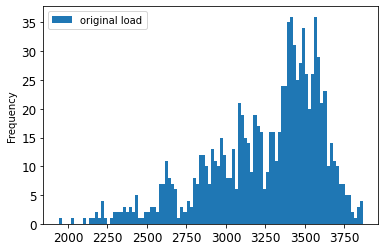

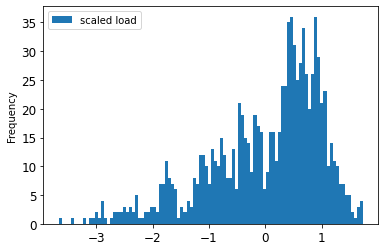

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,0.966659,0.648735,-0.616234,0.687014
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,0.863117,0.441893,-0.551306,0.510797
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,0.811346,0.582660,-0.484908,0.664637
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,0.803171,0.490730,-0.422430,0.642261
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,0.745951,0.450511,-0.352357,0.449260
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,0.841318,0.574042,-0.274688,0.589116
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,0.887640,0.539568,-0.226666,0.547159
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,0.781373,0.493603,-0.188199,0.513594
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,0.740501,0.398800,-0.162718,0.345767
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,0.664207,0.384436,-0.158552,0.387724


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-0.277988,-0.138286,-0.883443,-1.658081,-1.228137,-1.532459,-0.376896,-0.900206,-1.136030,1.327241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988
7202,-0.289176,-0.338239,-0.649914,-1.658081,-1.228137,-1.532459,-0.267567,-0.956324,-1.012585,1.281911,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176
7203,-0.194074,-0.538192,-0.416386,-1.658081,-1.228137,-1.532459,-0.183469,-0.633646,-0.934029,1.271245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074
7204,-0.174495,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.127403,-0.482127,-0.869501,1.239248,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495
7205,-0.110161,-0.538192,-0.416386,-1.513750,-1.228137,-1.532459,-0.273174,-0.369891,-0.891946,1.119257,...,NaN,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161
7206,-0.079393,-0.560534,-0.432824,-1.513750,-1.228137,-1.532459,-0.284387,-0.260461,-0.948057,1.161921,...,NaN,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393
7207,-0.096176,-0.582875,-0.449261,-1.513750,-1.228137,-1.532459,-0.189075,-0.176284,-0.625417,1.132590,...,NaN,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176
7208,-0.054219,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.169452,-0.120166,-0.473916,1.135256,...,NaN,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219
7209,-0.090581,-0.582875,-0.449261,-1.369419,-1.228137,-1.532459,-0.104976,-0.266073,-0.361693,1.049930,...,NaN,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581
7210,-0.224843,-1.092253,0.454685,-1.369419,-1.228137,-1.532459,-0.074140,-0.277296,-0.252276,1.036597,...,-0.277988,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7211,-0.353509,-1.601631,1.358631,-1.369419,-1.228137,-1.532459,-0.090960,-0.181896,-0.168109,1.004600,...,-0.289176,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843,-0.353509
7212,-0.423437,-1.601631,1.358631,-1.225087,-1.228137,-1.532459,-0.048910,-0.162255,-0.111998,0.940605,...,-0.194074,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843,-0.353509,-0.423437
7213,-0.417843,-1.601631,1.358631,-1.225087,-1.228137,-1.532459,-0.085353,-0.097719,-0.257887,0.873944,...,-0.174495,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843,-0.353509,-0.423437,-0.417843
7214,-0.445814,-1.648547,1.457065,-1.225087,-1.228137,-1.532459,-0.219911,-0.066854,-0.269110,0.865945,...,-0.110161,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843,-0.353509,-0.423437,-0.417843,-0.445814
7215,-0.451408,-1.695463,1.555499,-1.225087,-1.228137,-1.532459,-0.348863,-0.083689,-0.173720,0.956604,...,-0.079393,-0.096176,-0.054219,-0.090581,-0.224843,-0.353509,-0.423437,-0.417843,-0.445814,-0.451408


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,0.351361
7212,0.429680
7213,0.435275
7214,0.449260
7215,0.460449
...,...
8057,0.989102
8058,1.103783
8059,1.095392
8060,1.045044


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7211,-0.353509,-0.353509,-0.224843,-0.090581,-0.054219,-0.096176,-0.079393,-0.110161,-0.174495,-0.194074,...,-1.369419,-1.228137,-1.532459,-0.090960,-0.181896,-0.168109,1.004600,0.634234,0.298252,-0.173008
7212,-0.423437,-0.423437,-0.353509,-0.224843,-0.090581,-0.054219,-0.096176,-0.079393,-0.110161,-0.174495,...,-1.225087,-1.228137,-1.532459,-0.048910,-0.162255,-0.111998,0.940605,0.533416,0.186213,-0.198489
7213,-0.417843,-0.417843,-0.423437,-0.353509,-0.224843,-0.090581,-0.054219,-0.096176,-0.079393,-0.110161,...,-1.225087,-1.228137,-1.532459,-0.085353,-0.097719,-0.257887,0.873944,0.497994,0.105774,-0.210740
7214,-0.445814,-0.445814,-0.417843,-0.423437,-0.353509,-0.224843,-0.090581,-0.054219,-0.096176,-0.079393,...,-1.225087,-1.228137,-1.532459,-0.219911,-0.066854,-0.269110,0.865945,0.500719,0.059809,-0.224460
7215,-0.451408,-0.451408,-0.445814,-0.417843,-0.423437,-0.353509,-0.224843,-0.090581,-0.054219,-0.096176,...,-1.225087,-1.228137,-1.532459,-0.348863,-0.083689,-0.173720,0.956604,0.459847,0.085664,-0.247002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,-0.188480,-0.188480,-0.166103,-0.166103,-0.180089,-0.319944,-0.336727,-0.367495,-0.420640,-0.395466,...,1.517204,-0.717211,0.652546,-0.315223,-0.383921,-0.768501,-0.923244,0.822245,0.223559,-0.332511
8058,-0.157712,-0.157712,-0.188480,-0.166103,-0.166103,-0.180089,-0.319944,-0.336727,-0.367495,-0.420640,...,1.517204,-0.717211,0.652546,-0.175059,-0.409174,-0.577722,-0.821919,0.917613,0.272397,-0.294044
8059,-0.124147,-0.124147,-0.157712,-0.188480,-0.166103,-0.166103,-0.180089,-0.319944,-0.336727,-0.367495,...,1.517204,-0.717211,0.652546,-0.161042,-0.355862,-0.367305,-0.773923,0.939411,0.390182,-0.271013
8060,-0.163306,-0.163306,-0.124147,-0.157712,-0.188480,-0.166103,-0.166103,-0.180089,-0.319944,-0.336727,...,1.661535,-0.717211,0.652546,-0.161042,-0.324997,-0.353277,-0.653933,0.923062,0.344217,-0.252637


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=1),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=2)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=4)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=8)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.3))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))

model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(64,activation='linear')))

#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.000005)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:
import time
start=time.time()


history = model.fit(X_train,
          y_train,
          batch_size=300,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )

stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/300
24/24 [==============================] - 1s 39ms/step - loss: 1.0206 - val_loss: 1.1240
Epoch 2/300
24/24 [==============================] - 0s 17ms/step - loss: 1.0077 - val_loss: 1.1276
Epoch 3/300
24/24 [==============================] - 0s 17ms/step - loss: 0.9956 - val_loss: 1.1317
Epoch 4/300
24/24 [==============================] - 0s 18ms/step - loss: 0.9838 - val_loss: 1.1358
Epoch 5/300
24/24 [==============================] - 0s 17ms/step - loss: 0.9729 - val_loss: 1.1405
Epoch 6/300
24/24 [==============================] - 0s 18ms/step - loss: 0.9621 - val_loss: 1.1455
Training time: 7.045403003692627s


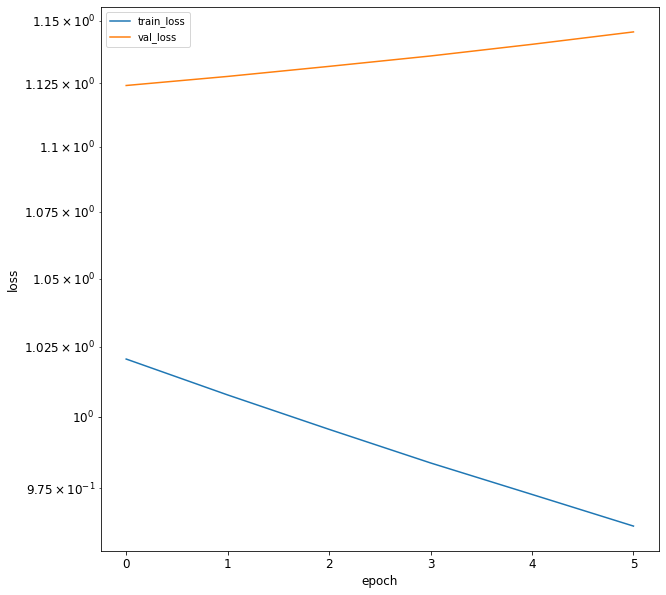

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,3572.0,31.667452,62.221236,1.0,4.0,1.0,3645.0,3611.0,3566.0,3223.0,3119.0,3776.0,3609.916667
8163,3529.0,31.032452,64.539000,1.0,4.0,1.0,3642.0,3627.0,3616.0,3215.0,3129.0,3753.0,3602.666667
8164,3548.0,31.032452,64.539000,2.0,4.0,1.0,3624.0,3601.0,3583.0,3183.0,3113.0,3732.0,3599.750000
8165,3538.0,31.032452,64.539000,2.0,4.0,1.0,3603.0,3604.0,3591.0,3158.0,3107.0,3696.0,3595.333333
8166,3519.0,31.007451,66.080650,2.0,4.0,1.0,3572.0,3645.0,3611.0,3127.0,2996.0,3674.0,3587.666667
8167,3491.0,30.982450,67.622300,2.0,4.0,1.0,3529.0,3642.0,3627.0,3107.0,3058.0,3656.0,3576.333333
8168,3472.0,30.982450,67.622300,3.0,4.0,1.0,3548.0,3624.0,3601.0,3081.0,3066.0,3632.0,3565.583333
8169,3481.0,30.982450,67.622300,3.0,4.0,1.0,3538.0,3603.0,3604.0,3061.0,3046.0,3602.0,3555.333333
8170,3453.0,30.312450,67.987480,3.0,4.0,1.0,3519.0,3572.0,3645.0,3052.0,3042.0,3605.0,3539.333333
8171,3400.0,29.642450,68.352660,3.0,4.0,1.0,3491.0,3529.0,3642.0,3021.0,2987.0,3623.0,3519.166667


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


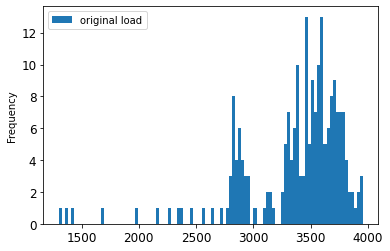

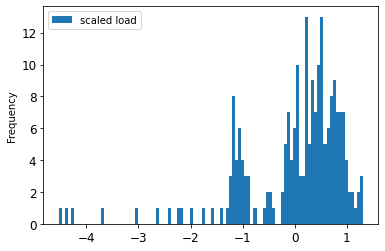

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,-0.096212,1.997397,0.604636,-1.246365
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,-0.066969,1.935974,0.586968,-1.186957
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,-0.113757,1.879893,0.579861,-1.164954
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,-0.131303,1.783753,0.569097,-1.149552
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,-0.455899,1.725001,0.550414,-1.094544
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,-0.274593,1.676931,0.522795,-1.079142
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,-0.251199,1.612838,0.496598,-1.098945
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,-0.309684,1.532721,0.471620,-1.186957
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,-0.321382,1.540733,0.432628,-1.184757
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,-0.482217,1.588803,0.383483,-1.180356


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,0.465474,-0.556642,1.031488,-1.498364,-1.004934,0.0,0.623248,0.545068,0.445888,-0.148456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474
8163,0.370861,-0.698857,1.182558,-1.498364,-1.004934,0.0,0.616655,0.580188,0.555619,-0.166678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861
8164,0.412667,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.577094,0.523119,0.483197,-0.239566,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667
8165,0.390664,-0.698857,1.182558,-1.357685,-1.004934,0.0,0.530941,0.529704,0.500754,-0.296509,...,NaN,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664
8166,0.348858,-0.704456,1.283042,-1.357685,-1.004934,0.0,0.462809,0.619697,0.544646,-0.367119,...,NaN,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858
8167,0.287249,-0.710056,1.383525,-1.357685,-1.004934,0.0,0.368303,0.613112,0.579760,-0.412674,...,NaN,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249
8168,0.245443,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.410061,0.573603,0.522700,-0.471896,...,NaN,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443
8169,0.265246,-0.710056,1.383525,-1.217006,-1.004934,0.0,0.388083,0.527509,0.529284,-0.517450,...,NaN,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246
8170,0.203637,-0.860109,1.407327,-1.217006,-1.004934,0.0,0.346325,0.459465,0.619264,-0.537950,...,NaN,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637
8171,0.087021,-1.010163,1.431129,-1.217006,-1.004934,0.0,0.284787,0.365082,0.612680,-0.608560,...,0.465474,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8172,0.065018,-1.010163,1.431129,-1.076327,-1.004934,0.0,0.243028,0.406786,0.573176,-0.656393,...,0.370861,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021,0.065018
8173,0.047416,-1.010163,1.431129,-1.076327,-1.004934,0.0,0.262809,0.384837,0.527089,-0.713336,...,0.412667,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021,0.065018,0.047416
8174,0.021012,-1.056075,1.517730,-1.076327,-1.004934,0.0,0.201270,0.343133,0.459056,-0.763446,...,0.390664,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021,0.065018,0.047416,0.021012
8175,0.043015,-1.101987,1.604331,-1.076327,-1.004934,0.0,0.084786,0.281674,0.364687,-0.893278,...,0.348858,0.287249,0.245443,0.265246,0.203637,0.087021,0.065018,0.047416,0.021012,0.043015
8176,0.038614,-1.101987,1.604331,-0.935648,-1.004934,0.0,0.062808,0.239970,0.406384,-0.843167,...,0.287249,0.245443,0.265246,0.203637,0.087021,0.065018,0.047416,0.021012,0.043015,0.038614


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-1.109946
8173,-1.112147
8174,-1.061539
8175,-1.050538
8176,-1.057139
...,...
8269,0.447872
8270,0.474275
8271,0.463274
8272,0.529283


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8172,0.065018,0.065018,0.087021,0.203637,0.265246,0.245443,0.287249,0.348858,0.390664,0.412667,...,-1.076327,-1.004934,0.0,0.243028,0.406786,0.573176,-0.656393,-0.444202,1.506015,0.335963
8173,0.047416,0.047416,0.065018,0.087021,0.203637,0.265246,0.245443,0.287249,0.348858,0.390664,...,-1.076327,-1.004934,0.0,0.262809,0.384837,0.527089,-0.713336,-0.467596,1.457945,0.291083
8174,0.021012,0.021012,0.047416,0.065018,0.087021,0.203637,0.265246,0.245443,0.287249,0.348858,...,-1.076327,-1.004934,0.0,0.201270,0.343133,0.459056,-0.763446,-0.520233,1.297712,0.250061
8175,0.043015,0.043015,0.021012,0.047416,0.065018,0.087021,0.203637,0.265246,0.245443,0.287249,...,-1.076327,-1.004934,0.0,0.084786,0.281674,0.364687,-0.893278,-0.485142,1.407205,0.219802
8176,0.038614,0.038614,0.043015,0.021012,0.047416,0.065018,0.087021,0.203637,0.265246,0.245443,...,-0.935648,-1.004934,0.0,0.062808,0.239970,0.406384,-0.843167,-0.441277,1.433911,0.185279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-1.186957,-1.186957,-1.098945,-1.079142,-1.094544,-1.149552,-1.164954,-1.186957,-1.246365,-1.259567,...,-1.076327,0.516823,0.0,-1.150379,-1.261379,-1.399796,0.213705,-0.517309,-0.096316,-1.297196
8270,-1.184757,-1.184757,-1.186957,-1.098945,-1.079142,-1.094544,-1.149552,-1.164954,-1.186957,-1.246365,...,-1.076327,0.516823,0.0,-1.095434,-1.248210,-1.239588,0.186372,-0.581643,-0.144386,-1.292322
8271,-1.180356,-1.180356,-1.184757,-1.186957,-1.098945,-1.079142,-1.094544,-1.149552,-1.164954,-1.186957,...,-1.076327,0.516823,0.0,-1.080049,-1.188946,-1.167166,0.209149,-0.748327,-0.112340,-1.293743
8272,-1.109946,-1.109946,-1.180356,-1.184757,-1.186957,-1.098945,-1.079142,-1.094544,-1.149552,-1.164954,...,-0.935648,0.516823,0.0,-1.099830,-1.166996,-1.151803,0.204594,-0.683993,-0.072281,-1.290088


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()

predictions = model.predict(X_test)
stop=time.time()
predictions

print(f"Test time: {stop - start}s")

Test time: 0.4910283088684082s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3360.450472
dtype: float64
Cons    455.557589
dtype: float64


In [47]:
load_mean=3360.450472
load_std=455.557589
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8172,2854.806033
8173,2853.803666
8174,2876.858104
8175,2881.869938
8176,2878.862838
...,...
8269,3564.481775
8270,3576.510178
8271,3571.498343
8272,3601.569349


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[3398.5168],
       [3395.6438],
       [3392.935 ],
       [3394.7222],
       [3391.62  ],
       [3388.324 ],
       [3388.9282],
       [3387.5596],
       [3384.8289],
       [3383.4058],
       [3383.346 ],
       [3383.142 ],
       [3379.5808],
       [3380.5435],
       [3373.7783],
       [3371.475 ],
       [3373.0396],
       [3375.1172],
       [3371.9531],
       [3377.1235],
       [3376.2302],
       [3376.104 ],
       [3377.4338],
       [3385.9346],
       [3389.642 ],
       [3390.0642],
       [3393.562 ],
       [3398.1887],
       [3398.0273],
       [3397.504 ],
       [3402.1536],
       [3403.3018],
       [3405.3252],
       [3404.9844],
       [3405.6387],
       [3406.7483],
       [3408.3357],
       [3410.021 ],
       [3413.222 ],
       [3418.8638],
       [3420.5251],
       [3419.9888],
       [3427.1785],
       [3427.192 ],
       [3432.2192],
       [3437.0164],
       [3439.533 ],
       [3441.298 ],
       [3448.9717],
       [3444.63  ],


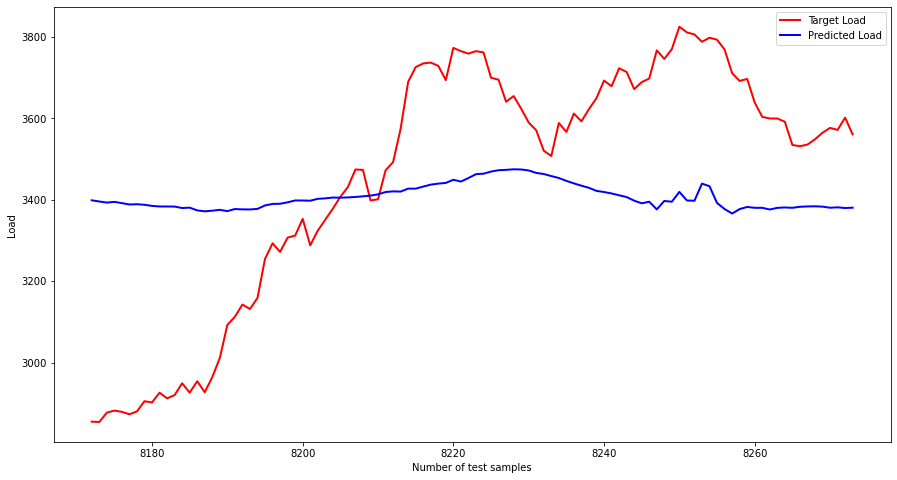

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

7.654655242762927


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    0.611464
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  285361.557826
8173  285261.380000
8174  287567.871481
8175  288069.198010
8176  287768.472659
...             ...
8269  356353.268628
8270  357556.503937
8271  357055.160120
8272  360063.098540
8273  355952.288167

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8172  295621.448050
8173  293590.729599
8174  266335.423162
8175  263017.409536
8176  262920.027730
...             ...
8269   32932.090219
8270   38499.947500
8271   36180.220582
8272   49278.260934
8273   32424.312646

[102 rows x 1 columns]
y_t+100    86427.376099
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    293.985333
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[3398.5168]
[3395.6438]
[3392.935]
[3394.7222]
[3391.62]
[3388.324]
[3388.9282]
[3387.5596]
[3384.8289]
[3383.4058]
[3383.346]
[3383.142]
[3379.5808]
[3380.5435]
[3373.7783]
[3371.475]
[3373.0396]
[3375.1172]
[3371.9531]
[3377.1235]
[3376.2302]
[3376.104]
[3377.4338]
[3385.9346]
[3389.642]
[3390.0642]
[3393.562]
[3398.1887]
[3398.0273]
[3397.504]
[3402.1536]
[3403.3018]
[3405.3252]
[3404.9844]
[3405.6387]
[3406.7483]
[3408.3357]
[3410.021]
[3413.222]
[3418.8638]
[3420.5251]
[3419.9888]
[3427.1785]
[3427.192]
[3432.2192]
[3437.0164]
[3439.533]
[3441.298]
[3448.9717]
[3444.63]
[3453.209]
[3462.7336]
[3463.9539]
[3469.1357]
[3472.4875]
[3473.3494]
[3474.722]
[3474.2932]
[3471.8635]
[3465.8696]
[3463.1125]
[3458.0754]
[3453.3472]
[3446.3066]
[3440.084]
[3434.4019]
[3429.177]
[3421.6794]
[3418.8962]
[3415.3586]
[3410.9136]
[3406.5059]
[3397.6658]
[3391.1172]
[3395.0444]
[3376.2769]
[3396.9375]
[3395.0603]
[3419.265]
[3398.114]
[3397.459]
[3439.5454]
[3433.135]
[3391.8914]
[3377.1565]
[3365.